In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#Ejercicio: Análisis de Producción Petrolera Objetivo: Cargar un archivo CSV, analizar información clave y visualizar los resultados.

df = pd.read_csv('produccion_petrolera_10000_ejercicio (1).csv')
df      

,Pozo,Fecha,Produccion_Barriles,Presion_PSI,Temperatura_C,Agua_Producida_Barriles,Estado
0,Pozo C,2022-08-04,1715,2677,61.49,268,Mantenimiento
1,Pozo D,2022-12-17,1886,2007,90.67,458,Cerrado
2,Pozo A,2022-08-06,2189,2602,75.20,68,Cerrado
3,Pozo C,2022-10-18,1684,2478,118.43,180,Mantenimiento
4,Pozo D,2022-01-06,2167,2038,99.73,272,Mantenimiento
...,...,...,...,...,...,...,...
9995,Pozo A,2022-10-11,1549,2490,99.03,429,Cerrado
9996,Pozo C,2022-08-27,1959,2399,60.05,295,Operando
9997,Pozo A,2022-01-23,1539,2317,89.78,350,Cerrado
9998,Pozo E,2022-08-09,1218,2693,108.96,444,Operando


In [7]:
#Pozo,Fecha,Produccion_Barriles,Presion_PSI,Temperatura_C,Agua_Producida_Barriles,Estado

#Paso 2: Análisis básico ¿Cuántos registros hay por pozo?
df['Pozo'].value_counts()

Pozo
Pozo A    2043
Pozo B    2032
Pozo E    2018
Pozo C    2004
Pozo D    1903
Name: count, dtype: int64

In [8]:
#Paso 2: ¿Cuál es el promedio de producción de cada pozo?: 
df.groupby('Pozo')['Produccion_Barriles'].mean() # Agrupa por pozo y saca promedio de la producción



Pozo
Pozo A    1499.085658
Pozo B    1495.391240
Pozo C    1502.992515
Pozo D    1498.425118
Pozo E    1498.542121
Name: Produccion_Barriles, dtype: float64

In [9]:
#Paso 2: ¿Qué pozo tiene la presión media más alta?
df.groupby('Pozo')['Presion_PSI'].mean().idxmax()  # Con esto encontramos el pozo con la presión media mas alta

'Pozo D'

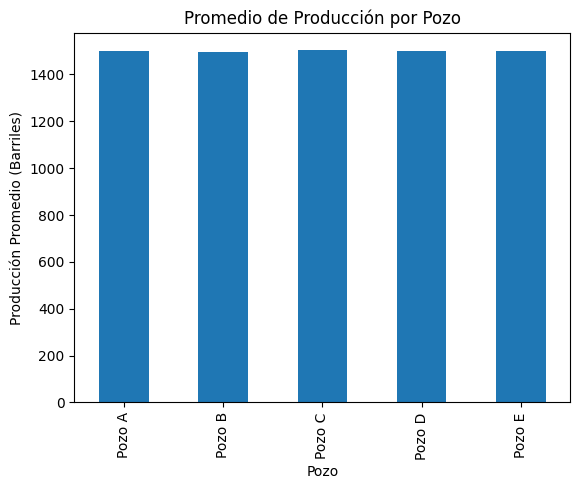

In [10]:
#Paso 3: Visualización Crea un gráfico de barras con el promedio de producción por pozo.
#¿Qué pozo tiene la presión media más alta?
df.groupby('Pozo')['Produccion_Barriles'].mean().plot(kind='bar', title='Promedio de Producción por Pozo')
plt.xlabel('Pozo')
plt.ylabel('Producción Promedio (Barriles)')
plt.show()


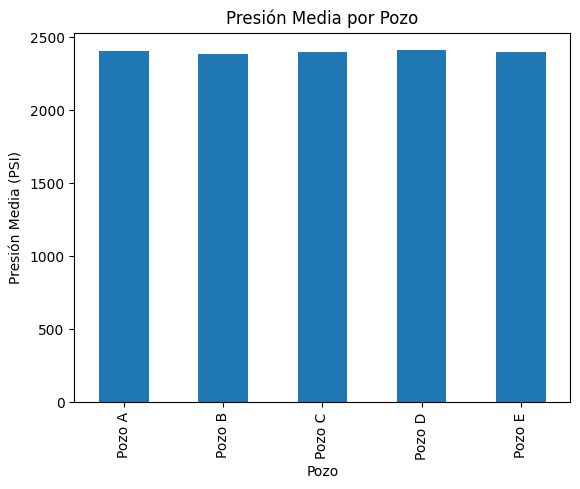

In [11]:
#¿Qué pozo tiene la presión media más alta?

df.groupby('Pozo')['Presion_PSI'].mean().plot(kind='bar', title='Presión Media por Pozo')
plt.xlabel('Pozo')
plt.ylabel('Presión Media (PSI)')
plt.show()  

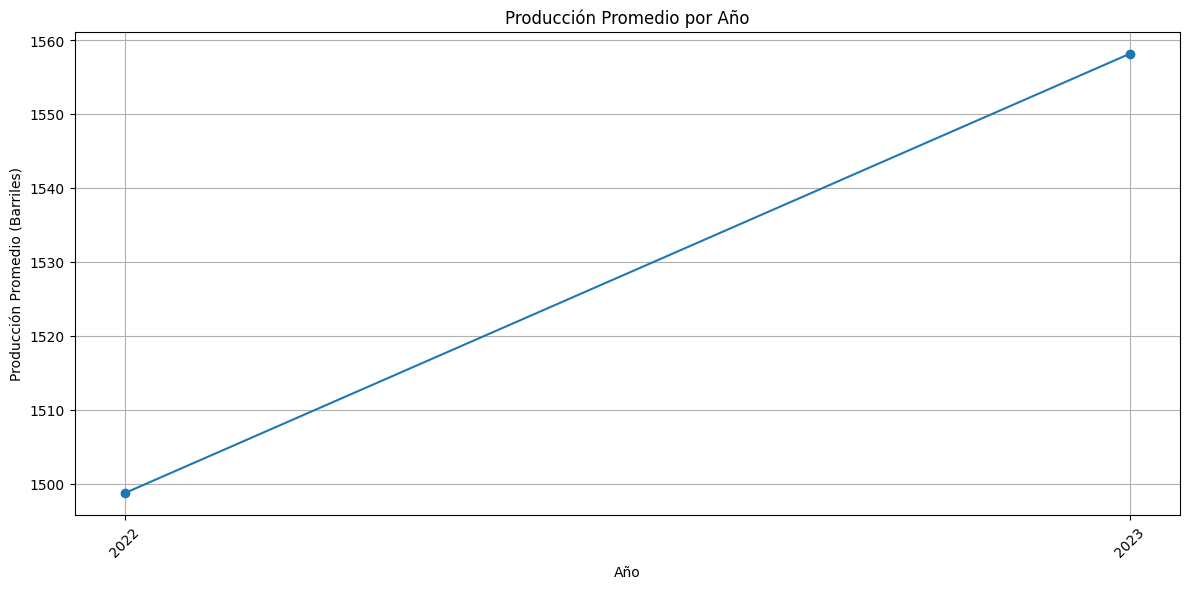

In [12]:

# Asegúrate de que la columna 'Fecha' sea tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupa por año y calcula el promedio de producción
produccion_por_anio = df.groupby(df['Fecha'].dt.year)['Produccion_Barriles'].mean()

plt.figure(figsize=(12, 6))
plt.plot(produccion_por_anio.index, produccion_por_anio.values, marker='o', linestyle='-')
plt.title('Producción Promedio por Año')
plt.ylabel('Producción Promedio (Barriles)')
plt.xlabel('Año')
plt.xticks(produccion_por_anio.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


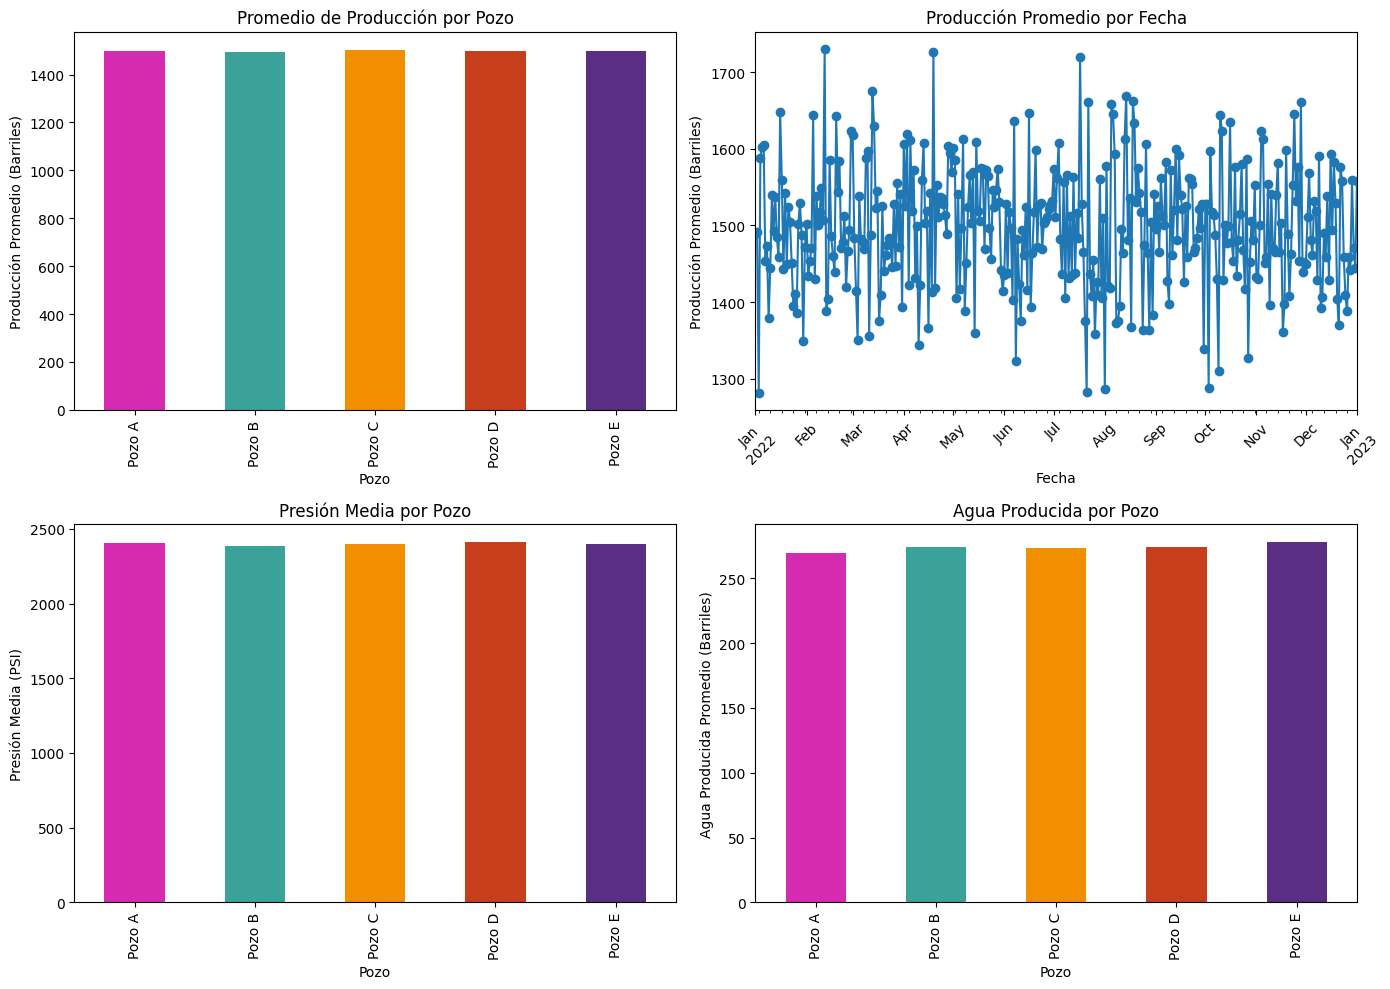

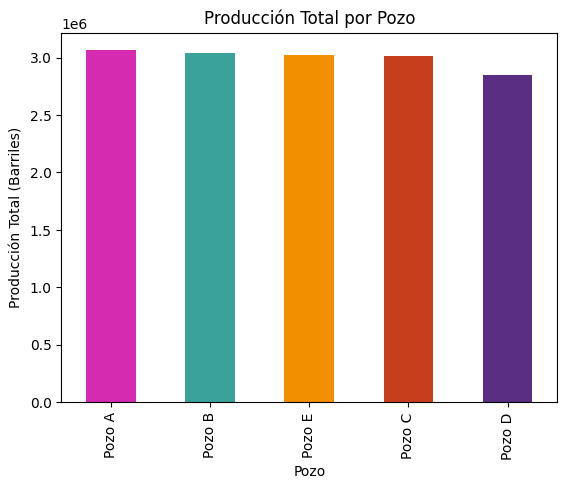

Producción Total por Pozo:
Pozo
Pozo A    3062632
Pozo B    3038635
Pozo E    3024058
Pozo C    3011997
Pozo D    2851503
Name: Produccion_Barriles, dtype: int64


In [16]:
#Crea un dashboard que muestre informacion importante para apoyarte en toma de decisiones.
Colores = ["#D42BB0", "#3BA299", '#F18F01', '#C73E1D', '#592E83']  # Colores para los gráficos
# Paso 4: Dashboard básico con matplotlib
fig, axs = plt.subplots(2, 2, figsize=(14, 10))     
# Gráfico 1: Promedio de Producción por Pozo
df.groupby('Pozo')['Produccion_Barriles'].mean().plot(kind='bar', ax=axs[0, 0], color=Colores, title='Promedio de Producción por Pozo')
axs[0, 0].set_xlabel('Pozo')
axs[0, 0].set_ylabel('Producción Promedio (Barriles)')  
# Gráfico 2: Producción Promedio por Fecha
df.groupby('Fecha')['Produccion_Barriles'].mean().plot(ax=axs[0, 1], marker='o', linestyle='-', title='Producción Promedio por Fecha')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Producción Promedio (Barriles)')
axs[0, 1].tick_params(axis='x', rotation=45)
# Gráfico 3: Presión Media por Pozo
df.groupby('Pozo')['Presion_PSI'].mean().plot(kind='bar', ax=axs[1, 0], color=Colores, title='Presión Media por Pozo')
axs[1, 0].set_xlabel('Pozo')
axs[1, 0].set_ylabel('Presión Media (PSI)')
# Gráfico 4: Agua Producida por Pozo
df.groupby('Pozo')['Agua_Producida_Barriles'].mean().plot(kind='bar', ax=axs[1, 1], color=Colores, title='Agua Producida por Pozo')
axs[1, 1].set_xlabel('Pozo')
axs[1, 1].set_ylabel('Agua Producida Promedio (Barriles)')
# Ajustes finales
plt.tight_layout()
plt.show()  
# Gráfico 5: Produccion total por pozo 
produccion_total_por_pozo = df.groupby('Pozo')['Produccion_Barriles'].sum().sort_values(ascending=False)
produccion_total_por_pozo.plot(kind='bar', color=Colores, title='Producción Total por Pozo')
plt.xlabel('Pozo')
plt.ylabel('Producción Total (Barriles)')
plt.show()          
print("Producción Total por Pozo:")
print(produccion_total_por_pozo)        

